# 2. Data Visualization
In this notebook we will use our extracted data and visualize it. For that purpose, we are importing function from our ```modules``` folder.

## 2.1 Libraries

We import the necessary libraries, including our own library in the modules file

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor

In [2]:
# We import our own functions
import sys
sys.path.append('../../..')  # Move two levels up to the project root
from modules.functions import *

## 2.2 Loading dataframe

In [3]:
df = pd.read_csv('../../../input/df_h19_raw.csv', parse_dates=['Fecha'], index_col='Fecha')
df.head()

,CPI,CPI Tradable,CPI Non-Tradable,CPI Core,CPI Non-Core,CPI Food and Energy,CPI Excluding Food and Energy,CPI Food and Beverages,CPI Excluding Food and Beverages,CPI Core Excluding Food and Beverages,CPI Imported,Wholesale Price Index,Reserve Requirement Rate,Monetary Policy Rate,Circulating Currency Seasonally Adjusted (mill S/),Net International Reserves (mill $),Real Minimum Wage (Index)
Fecha,,,,,,,,,,,,,,,,,
2003-10-01,0.492247,0.460730,0.514069,0.091267,1.078211,0.916599,-0.008282,0.987035,0.050294,0.031116,1.056286,0.646277,10.349944,2.75,0.010225,0.005542,0.056953
2003-11-01,0.465462,0.449419,0.476486,0.092842,1.009369,0.858081,0.002340,0.909263,0.069318,0.032549,1.014146,0.615219,11.690608,2.50,0.011445,0.050288,-0.001674
2003-12-01,0.438413,0.437075,0.439183,0.094296,0.940109,0.799280,0.012736,0.831909,0.087472,0.033944,0.970034,0.582957,11.391178,2.50,0.016607,-0.010532,-0.005608
2004-01-01,0.411138,0.423839,0.402122,0.095620,0.870541,0.740242,0.022936,0.754927,0.104864,0.035360,0.924542,0.549642,10.634030,2.50,0.019490,0.036233,-0.005346
2004-02-01,0.383700,0.409852,0.365307,0.096795,0.800843,0.681065,0.032967,0.678293,0.121634,0.036840,0.878410,0.515502,10.718295,2.50,0.017003,-0.005743,-0.010744


In [4]:
df_lags = pd.read_csv('../../../input/df_h19_lags.csv', parse_dates=['Fecha'], index_col='Fecha')
df_lags.head()

,CPI,CPI Tradable_lag_1,CPI Tradable_lag_2,CPI Non-Tradable_lag_1,CPI Non-Tradable_lag_2,CPI Core_lag_1,CPI Core_lag_2,CPI Non-Core_lag_1,CPI Non-Core_lag_2,CPI Food and Energy_lag_1,...,Reserve Requirement Rate_lag_1,Reserve Requirement Rate_lag_2,Monetary Policy Rate_lag_1,Monetary Policy Rate_lag_2,Circulating Currency Seasonally Adjusted (mill S/)_lag_1,Circulating Currency Seasonally Adjusted (mill S/)_lag_2,Net International Reserves (mill $)_lag_1,Net International Reserves (mill $)_lag_2,Real Minimum Wage (Index)_lag_1,Real Minimum Wage (Index)_lag_2
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-12-01,0.438413,0.449419,0.460730,0.476486,0.514069,0.092842,0.091267,1.009369,1.078211,0.858081,...,11.690608,10.349944,2.5,2.75,0.011445,0.010225,0.050288,0.005542,-0.001674,0.056953
2004-01-01,0.411138,0.437075,0.449419,0.439183,0.476486,0.094296,0.092842,0.940109,1.009369,0.799280,...,11.391178,11.690608,2.5,2.50,0.016607,0.011445,-0.010532,0.050288,-0.005608,-0.001674
2004-02-01,0.383700,0.423839,0.437075,0.402122,0.439183,0.095620,0.094296,0.870541,0.940109,0.740242,...,10.634030,11.391178,2.5,2.50,0.019490,0.016607,0.036233,-0.010532,-0.005346,-0.005608
2004-03-01,0.356172,0.409852,0.423839,0.365307,0.402122,0.096795,0.095620,0.800843,0.870541,0.681065,...,10.718295,10.634030,2.5,2.50,0.017003,0.019490,-0.005743,0.036233,-0.010744,-0.005346
2004-04-01,0.328509,0.395219,0.409852,0.328789,0.365307,0.097830,0.096795,0.731181,0.800843,0.621851,...,10.207277,10.718295,2.5,2.50,0.022076,0.017003,-0.008751,-0.005743,-0.004583,-0.010744


## 2.3 Visualizing our data

We do a quick inspect in our data by plotting our input variables

In [5]:
df.columns

Index(['CPI', 'CPI Tradable', 'CPI Non-Tradable', 'CPI Core', 'CPI Non-Core',
       'CPI Food and Energy', 'CPI Excluding Food and Energy',
       'CPI Food and Beverages', 'CPI Excluding Food and Beverages',
       'CPI Core Excluding Food and Beverages', 'CPI Imported',
       'Wholesale Price Index', 'Reserve Requirement Rate',
       'Monetary Policy Rate',
       'Circulating Currency Seasonally Adjusted (mill S/)',
       'Net International Reserves (mill $)', 'Real Minimum Wage (Index)'],
      dtype='object')

In [6]:
# We select our input variables: all except CPI
df_variables = df.loc[:, ['CPI Tradable', 'CPI Non-Tradable', 'CPI Core', 'CPI Non-Core',
       'CPI Food and Energy', 'CPI Excluding Food and Energy',
       'CPI Food and Beverages', 'CPI Excluding Food and Beverages',
       'CPI Core Excluding Food and Beverages', 'CPI Imported',
       'Wholesale Price Index', 'Reserve Requirement Rate',
       'Monetary Policy Rate',
       'Circulating Currency Seasonally Adjusted (mill S/)',
       'Net International Reserves (mill $)', 'Real Minimum Wage (Index)']]

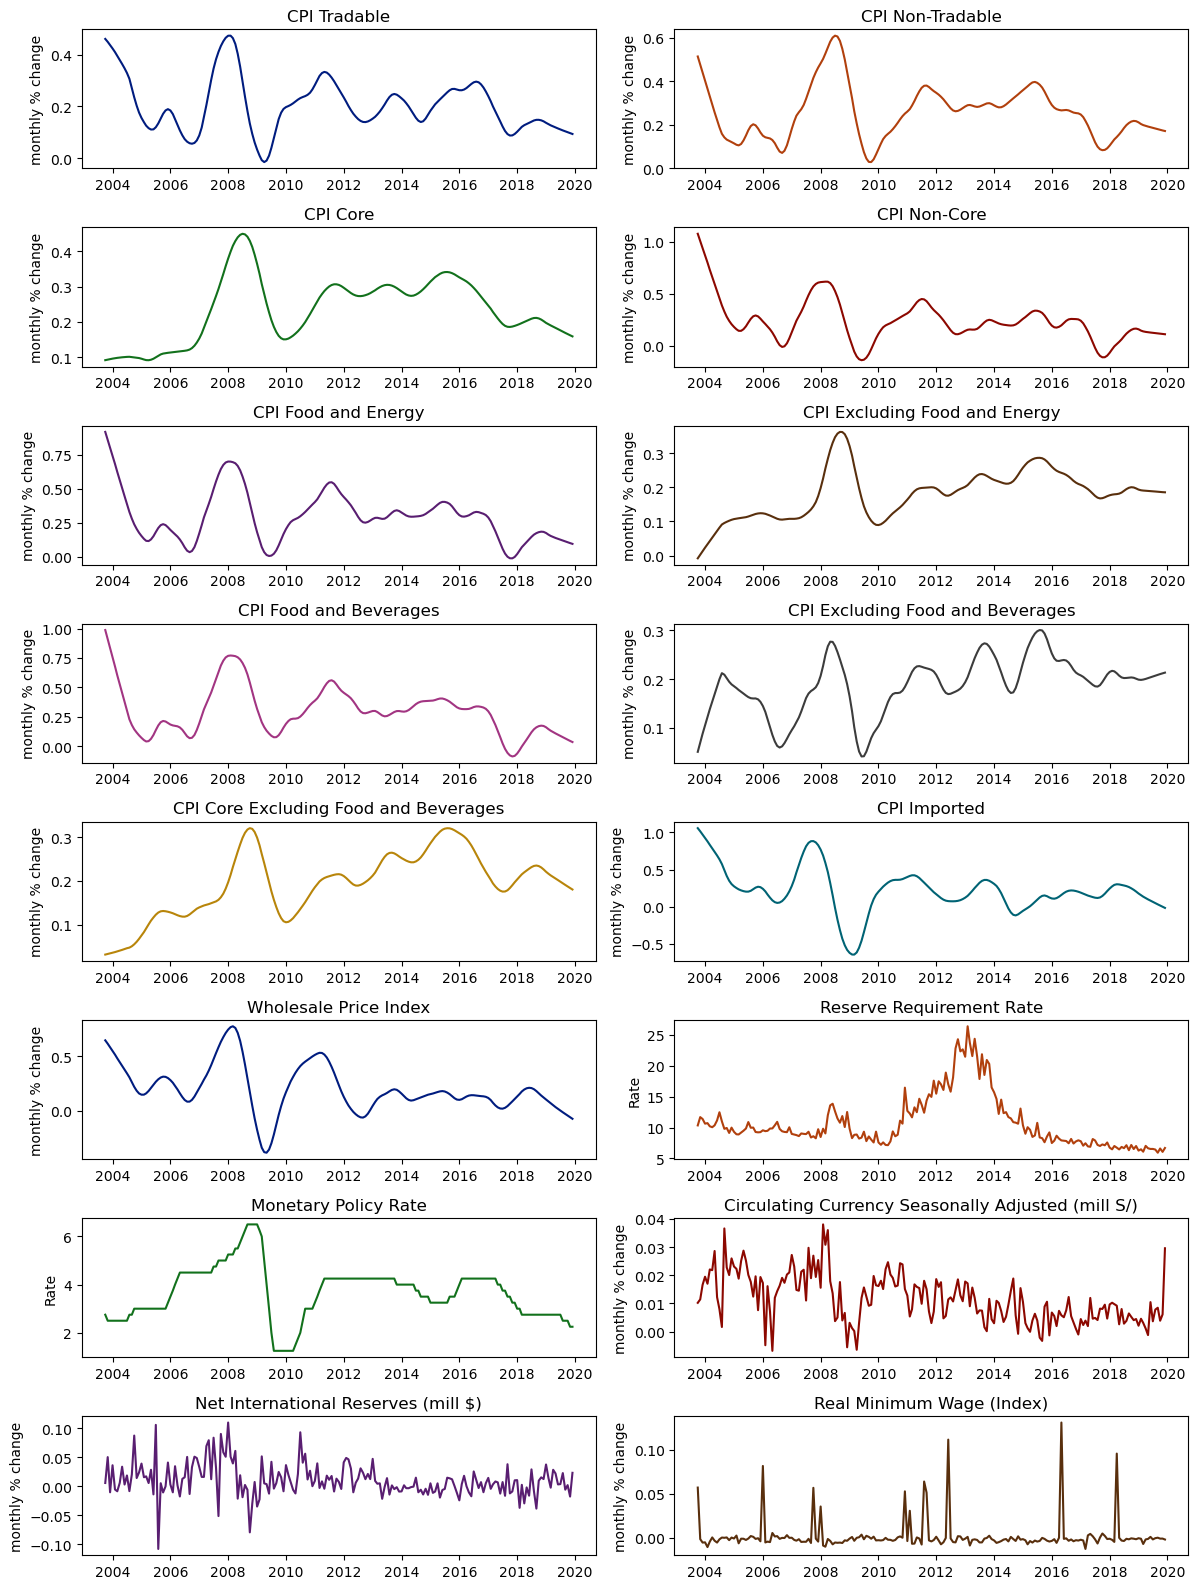

In [7]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))


columns = df_variables.columns

colors = sns.color_palette("dark", n_colors=len(columns))

# We iterate over the rows and columna for each plot
for i in range(8):
    for j in range(2):
        index = i * 2 + j
        ax = axes[i, j]
        ax.plot(df.index, df[columns[index]], color=colors[index])
        ax.set_title(columns[index])
        if "Reserve Requirement Rate" in columns[index] or "Monetary Policy Rate" in columns[index]:
            ax.set_ylabel('Rate')
        else:
            ax.set_ylabel('monthly % change')
        

plt.tight_layout()

plt.savefig('../../../output/data_visualization/plot_variables_h19.png')
plt.show()

## 2.4 Getting correlations

First, we obtain the correlations between the Consumer Price Index (IPC) and all the variables

In [8]:
corr = df.corr()['CPI']
pd.DataFrame(corr)

,CPI
CPI,1.000000
CPI Tradable,0.826410
CPI Non-Tradable,0.949601
CPI Core,0.635439
CPI Non-Core,0.856538
CPI Food and Energy,0.947751
CPI Excluding Food and Energy,0.356521
CPI Food and Beverages,0.953130
CPI Excluding Food and Beverages,0.473752
CPI Core Excluding Food and Beverages,0.299110


Then, we obtain the correlations between the Core Consumer Price Index (IPC Alimentos y Energía) and all the variables

## 2.5 Visualizing correlations

In [10]:
sns.pairplot(df)
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/data_visualization/pairplot_h19.png')

Error in callback <function flush_figures at 0x00000233B1B8B2E0> (for post_execute):



KeyboardInterrupt



In [ ]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/data_visualization/heatmap_h19.png')

In [12]:
corr = df_lags.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.tight_layout(pad=1.0)
plt.savefig('../../../output/data_visualization/heatmap_lags_h19.png')

Error in callback <function flush_figures at 0x00000233B1B8B2E0> (for post_execute):


KeyboardInterrupt: 